# TS4: Estimadores espectrales

### Miranda Viceconte

## 1. Primeras nociones de estimación espectral.

### a. ¿Que es un estimador? 

Un estimador es una función o procedimiento que permite evaluar parámetros desconocidos de una señal —por ejemplo, su frecuencia o amplitud— a partir de sus muestras observadas. Esto es necesario porque, en la práctica, las señales suelen estar afectadas por ruido, errores de medición, o incluso por el propio proceso de cuantización digital, que introduce incertidumbre al representar valores continuos con un número finito de bits.

Analizar estimadores nos permite entender cuán precisos y confiables son los métodos que utilizamos para recuperar parámetros relevantes en señales reales. En este caso particular, nos enfocamos en dos parámetros fundamentales:

* La amplitud de una senoidal, que representa su energía.

* La frecuencia, que determina la periodicidad de la señal.

Estos parámetros son especialmente importantes en sistemas de comunicaciones, análisis espectral, y procesamiento biomédico, donde una señal ruidosa puede ocultar información relevante que sólo se puede recuperar con estimadores robustos

Una señal tipica tiene la siguiente forma: 
$$ x(n)= a_n* sin(\Omega_1*n= + n_a(n) $$
Donde: 
* $ a_1$: amplitud  de la senoidal 
* $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N} $: frecuencia angular
* $\Omega_0 = \frac{\pi}{2} $: frecuencia central
* $ f_r \sim \mathcal{U} \left( -\frac{1}{2}, \frac{1}{2} \right) $: variacion aleatoria
* $ n_a(n) \sim \mathcal{N}(0, \sigma^2) $: ruido blanco

El término $ f_r $ introduce una pequeña variación aleatoria en la frecuencia de cada realización de la señal. Esto simula incertidumbre en la frecuencia exacta. A su vez, el ruido blanco gaussiano $ n_a(n)$ simula perturbaciones típicas de sistemas reales, como interferencias o errores térmicos.

¿Por que usamos los estimadores y sobre que valores? 
En una señal senoidal pura, los dos parámetros que la caracterizan completamente son su frecuencia y su amplitud. En presencia de ruido, estos parámetros se ven distorsionados, por lo que es necesario estimarlos para recuperar la información original.

Por eso, se propone usar los siguientes estimadores: 

- **Estimador de amplitud**: 
$$ \hat{a}_1^{(i)} = \left| X_{iw}(\Omega_0) \right| = \left| \mathcal{F}\{x(n) \cdot w_i(n)\} \right| $$

- **Estimador espectral**
$$ \hat{\Omega}_1^{(i)} = \underset{\Omega}{\mathrm{arg\,max}} \left\{ \left| X_{iw}(\Omega) \right| \right\} $$

Siendo $w_i(n)$ una ventana cualesquiera. 


### b. Ventaneo y desparramo espectral

Cuando aplicamos una ventana a una señal en el dominio del tiempo, estamos realizando una multiplicación punto a punto entre la señal y la ventana. En el dominio de la frecuencia, esta operación se traduce en una convolución entre el espectro de la señal y el espectro de la ventana.

Esto implica que, al limitar la señal en el tiempo, estamos afectando su representación en frecuencia: la energía de la señal se redistribuye a lo largo del espectro, lo que genera lo que se conoce como desparramo espectral (leakage).

La resolución espectral está directamente relacionada con el ancho del lóbulo principal de la transformada de la ventana:

* Una ventana más ancha (en el tiempo) permite una mejor resolución en frecuencia, ya que su lóbulo principal es más angosto. Sin embargo, esto suele generar lóbulos laterales más altos, lo que produce mayor desparramo espectral.

* Una ventana más angosta produce lóbulos laterales más bajos (menos leakage), pero el lóbulo principal es más ancho, lo que implica peor resolución espectral.

En resumen, existe un compromiso entre resolución espectral y desparramo: no se pueden optimizar ambos aspectos al mismo tiempo. Este fenómeno afecta directamente la precisión de los estimadores, ya que la energía de una frecuencia puede “fugarse” hacia otras, dificultando la estimación exacta de parámetros como la frecuencia o amplitud de la señal.

Por lo tanto, la resolución espectral y el desparramo espectral están estrechamente relacionados con la forma de la ventana que aplicamos. Elegir la ventana correcta es fundamental para obtener estimaciones precisas, ya que puede reducir el desparramo mientras mantiene una buena resolución en la frecuencia.

Este proceso de "desplazar" la ventana y tomar las muestras según la resolución espectral tiene el objetivo de mejorar nuestra capacidad de identificar características importantes de la señal, como su frecuencia y amplitud, a pesar del ruido o las limitaciones de la cuantización.

Se analizarán diferentes tipos de ventanas:

- **Rectangular**
La ventana rectangular es la más simple y se utiliza cuando no se aplica ninguna ventana o "recorte" a la señal. Esta ventana toma la señal tal como es y no la modifica. Tiene una alta resolucion, pero induce mucho desparramo especral.

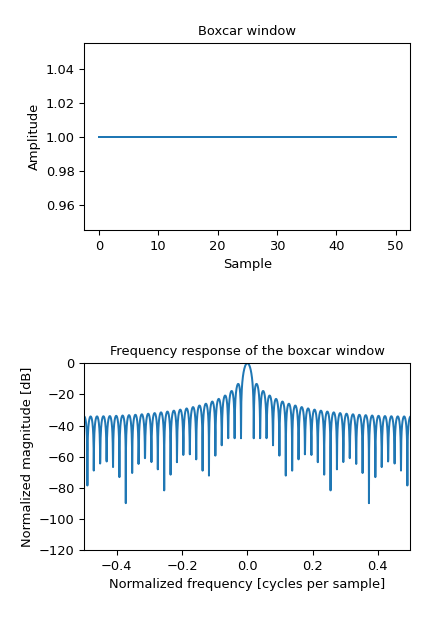

- **BartHannin**
La ventana Bart-Hann es una mezcla entre la ventana triangular y la Blackman-Harris. Es suave en sus bordes y tiene una caída más gradual que la rectangular, similar a la Blackman-Harris, pero con una forma más simple. El desparramo espectral no se reduce tanto como con otras ventanas y una resolucion espectral media. 

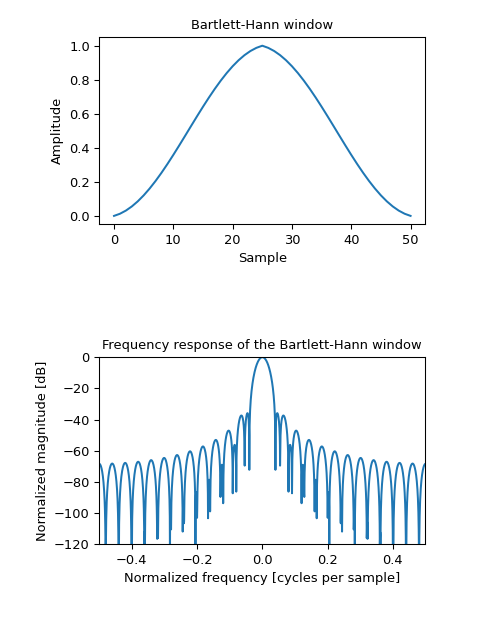 

- **Flattop**
La ventana flattop se caracteriza por tener una forma que trata de aplanar el máximo de la señal en el centro, reduciendo la influencia de las colas de la ventana. Está diseñada para minimizar los errores en la estimación de la amplitud, ya que la forma "plana" reduce los efectos del desparramo espectral.
 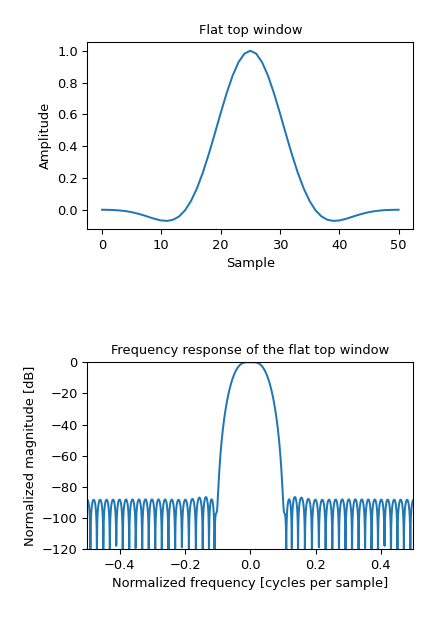 

- **Blackman-Harris**
La ventana Blackman-Harris es una ventana de forma más suave que se utiliza comúnmente para reducir el desparramo espectral. Su forma es más compleja que la rectangular, con una caída más gradual hacia los bordes, lo que ayuda a disminuir los lóbulos laterales en el dominio de la frecuencia.
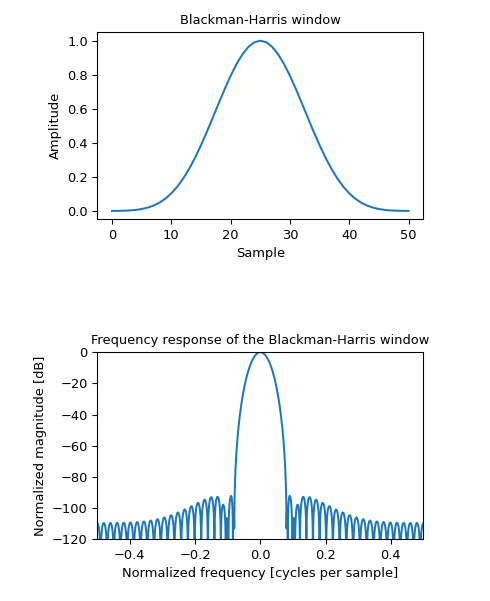 


### c. Análisis probabilistico 

En el procesamiento de señales, particularmente en la estimación espectral, el análisis probabilístico cumple un rol central para evaluar la calidad de los estimadores. Dado que muchas señales de interés pueden modelarse como realizaciones de procesos aleatorios, los estimadores espectrales deben analizarse no solo en función de sus resultados puntuales, sino también en términos de su comportamiento estadístico.

Tres conceptos fundamentales en este análisis son la esperanza matemática, el sesgo y la varianza del estimador. La esperanza permite conocer el valor medio del estimador a lo largo de múltiples realizaciones del proceso. En base a la esperanza se puede definir el sesgo, entendido como la diferencia entre la esperanza del estimador y el valor verdadero del parámetro que se desea estimar. Por su parte, la varianza mide la dispersión de los valores del estimador alrededor de su esperanza, reflejando su estabilidad.

Un buen estimador espectral debe tener un sesgo bajo (idealmente ser insesgado) y una varianza controlada, ya que ambos factores inciden en el error cuadrático medio. Este balance es clave para interpretar correctamente el contenido frecuencial de señales aleatorias o determinísticas contaminadas con ruido.

### 2. Simulaciones/Código 

Este experimento tiene como objetivo evaluar el sesgo y la varianza de un estimador de amplitud para señales senoidales ruidosas, utilizando diferentes tipos de ventanas y dos niveles de SNR (3 dB y 10 dB). Se realizarán 200 realizaciones con 1000 muestras cada una, y se analizarán las ventanas rectangular, flattop, y Blackman-Harris. El código calculará el sesgo y la varianza promedio de cada estimador para cada ventana y SNR.

In [2]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [3]:
#%% Definicion de funciones

def estimador_omega(f_t, N, df):
    FT_abs = np.abs(f_t[:N//2, :])
    omega_est = np.argmax(FT_abs, axis=0) * df
    return omega_est

In [6]:
#%% Datos de la simulacion, definicion de constantes

Np=1000 
SNRs = [3, 10]
R=200 #numero de muestras
a1= np.sqrt(2) #Amplitud de la señal, eligiendo esta ya estoy normalizando la señal. Ya no hace falta dividirla por la desviacion estandar
fs = 1000 # frecuencia de muestreo (Hz) conviene numero entero conocido 
N = 1000 # cantidad de muestras
N2= 10*N
ts = 1/fs  # tiempo de muestreo
df= fs/N #resolucion espectral 
df_pp=fs/N2
omega0= fs/4

In [7]:
#%% Generacion de la señal X

# Defino S

# Grilla de sampleo temporal ---> DISRETIZACION DEL TIEMPO (muestreo)
tt = np.linspace(0, (N-1)*ts, N).reshape((1000, 1))  #[1000x1]
tt= np.tile(tt, (1, R)) #Repetidor [100x200]

# Grilla sampleo frecuencial
ff= np.linspace(0, (N-1)*df, N) #.reshape(1, 1000) # [1,1000]
fr = np.random.uniform(-1/2, 1/2, size=(1,R)) # [1, 200]

omega1= omega0 + fr* (df)

S= a1*np.sin(2*np.pi*omega1*tt)

# Defino la ventana de Barthann
M=N
w= signal.windows.barthann(M).reshape((Np, 1)) #[1000, 1]

# Defino la ventana de 
w2= signal.windows.blackmanharris(M).reshape((Np, 1)) #[1000, 1]

# Defino la ventana de 
w3= signal.windows.flattop(M).reshape((Np, 1)) #[1000, 1]

#Grilla de frecuencias  
freqs = np.fft.fftfreq(N, d=ts)

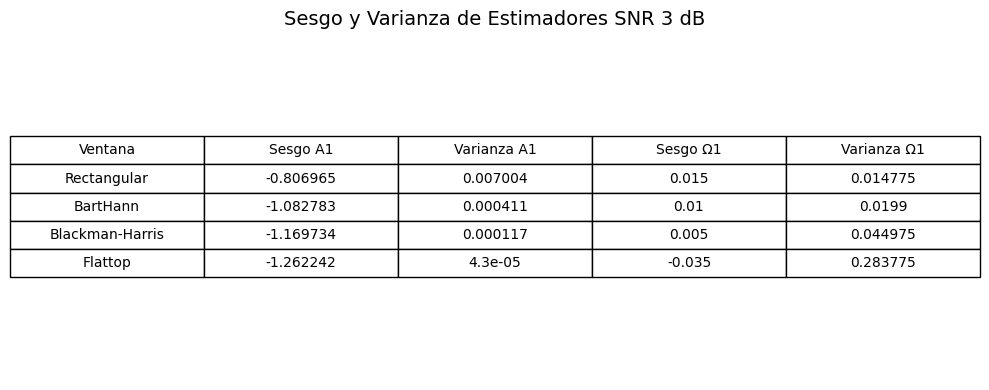

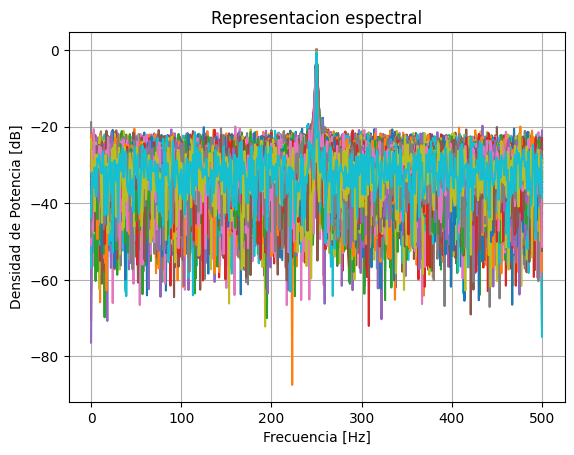

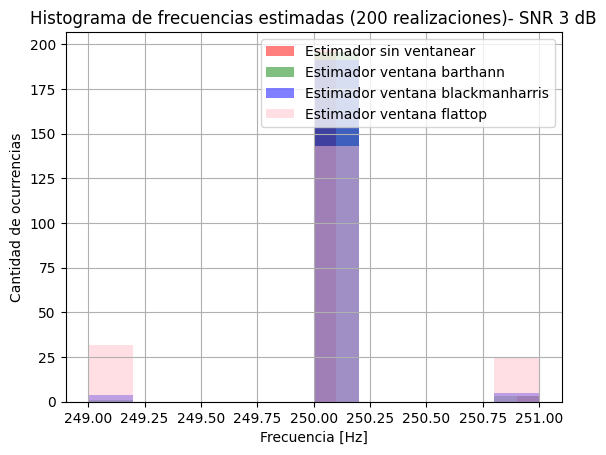

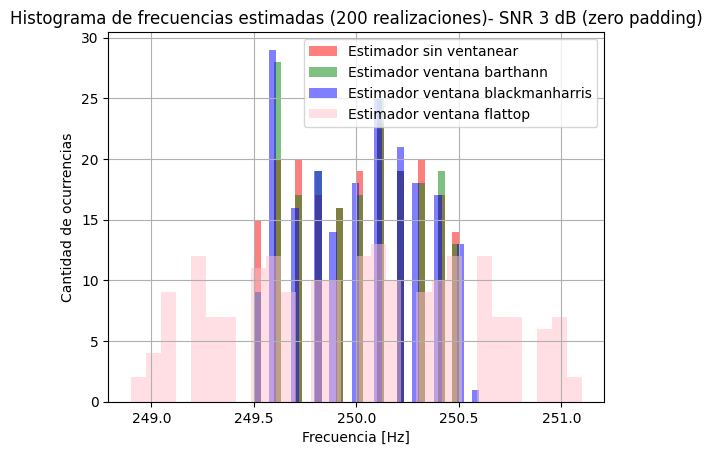

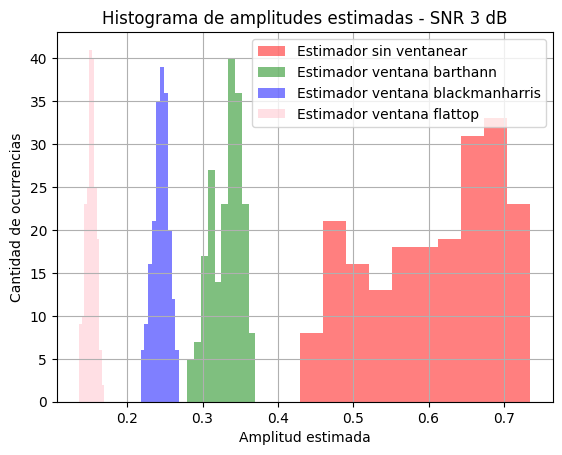

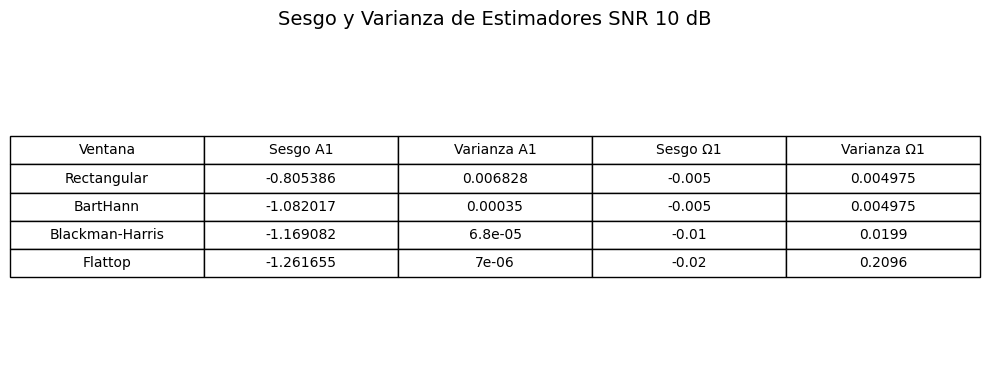

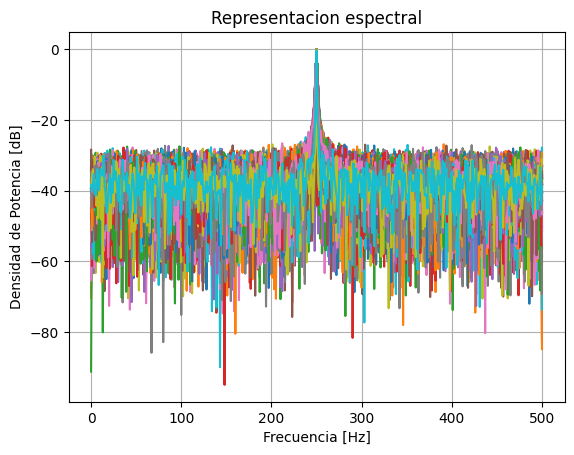

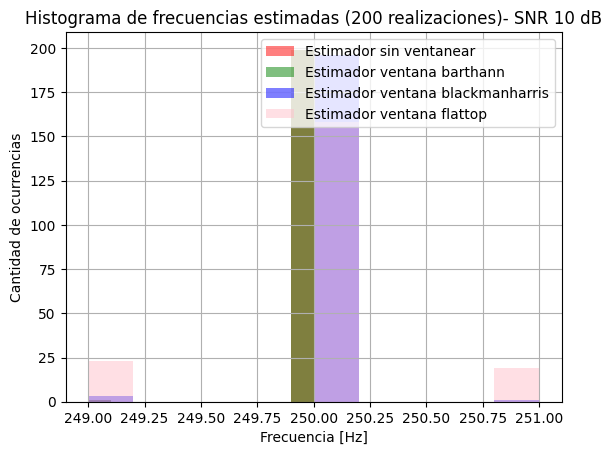

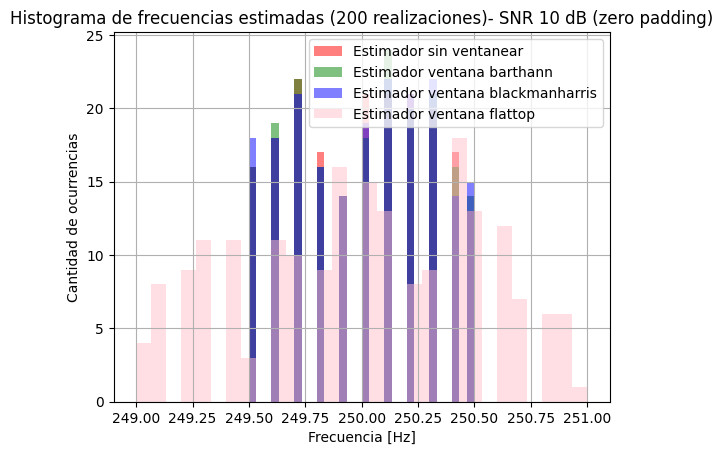

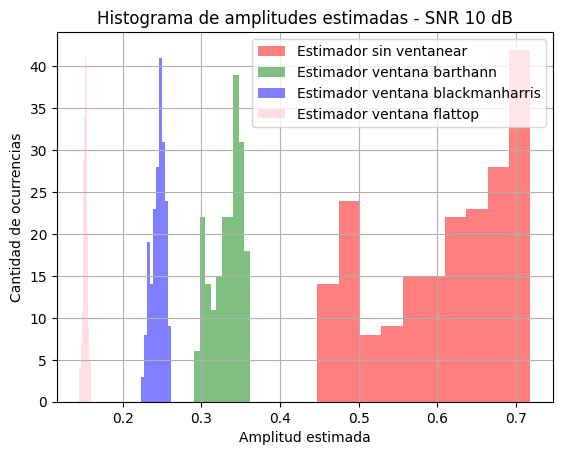

In [8]:
for snr_db in SNRs:
    # #%% Datos del ruido
    
    # # Señal analogica --> Lo saco de SNR
    pot_ruido_analog = 10**(- snr_db / 10)
    sigma= np.sqrt(pot_ruido_analog)
    # #Generacion de ruido analogico 
    nn = np.random.normal(0, sigma, (Np, R)) 
     
    # Señal final 
    xx = S + nn  # [1000x200]
    
    # Multiplicacion 
    xw= xx * w  # [1000, 200] * [1000, 1] → [1000, 200]
    xw2= xx * w2 
    xw3= xx * w3
    
    # Tranformada y estimadores 

    # Calculo la transformada sin zero padding 
    ft_xx = 1/N * np.fft.fft(xx,  axis=0) 
    ft_xw = 1/N * np.fft.fft(xw, axis=0) 
    ft_xw2 = 1/N * np.fft.fft(xw2, axis=0)
    ft_xw3 = 1/N * np.fft.fft(xw3, axis=0) 
    
    
    # Calculo la transformada con zero padding 
    ft_xx_pp = 1/N * np.fft.fft(xx,n=N2, axis=0) 
    ft_xw_pp = 1/N * np.fft.fft(xw, n=N2, axis=0) 
    ft_xw2_pp = 1/N * np.fft.fft(xw2, n=N2, axis=0)
    ft_xw3_pp = 1/N * np.fft.fft(xw3, n=N2, axis=0)
    
    # Calculo el estimador de amplitud (a1=mod(ft_xw))
    
    #Estimador---> en N/4 de la matriz xx  es 
    # # Estimador sin ventanear
    a1_est= np.abs(ft_xx[N//4, :])  # [1000, 200] // Division entera   
    
    # # Estimador ventana barthann
    a1_est2= np.abs(ft_xw[N//4, : ])  # [1000, 200]
    
    # # Estimador ventana blackmanharris
    a1_est3= np.abs(ft_xw2[N//4, :])  # [1000, 200]
    
    # # Estimador  ventana flattop
    a1_est4= np.abs(ft_xw3[N//4, :])  # [1000, 200]
    
    # SIN ZERO PADDING
    omega1_est = estimador_omega(ft_xx, N, df)
    omega2_est = estimador_omega(ft_xw, N, df)
    omega3_est = estimador_omega(ft_xw2, N, df)
    omega4_est = estimador_omega(ft_xw3, N, df)

    #BONUS- CON ZERO PADDING 
    omega1_est_pp = estimador_omega(ft_xx_pp, N2, df_pp)
    omega2_est_pp = estimador_omega(ft_xw_pp, N2, df_pp)
    omega3_est_pp = estimador_omega(ft_xw2_pp, N2, df_pp)
    omega4_est_pp = estimador_omega(ft_xw3_pp, N2, df_pp)
    
    #Calculo el sesgo y la varianza de estimador de amplitud
    valor_real=a1
    esperanza_a1_xx= np.mean(a1_est)
    esperanza_a1_xw= np.mean(a1_est2)
    esperanza_a1_xw2=np.mean(a1_est3)
    esperanza_a1_xw3= np.mean(a1_est4)
    
    sesgo_a1_xx= esperanza_a1_xx-valor_real
    sesgo_a1_xw= esperanza_a1_xw-valor_real
    sesgo_a1_xw2=esperanza_a1_xw2-valor_real
    sesgo_a1_xw3= esperanza_a1_xw3-valor_real
    
    varianza_a1_xx= np.var(a1_est)
    varianza_a1_xw=np.var(a1_est2)
    varianza_a1_xw2=np.var(a1_est3)
    varianza_a1_xw3=np.var(a1_est4)
    
    #Calculo el sesgo y la varianza de estimador de frecuencia espectral
    
    valor_real2= omega0 

    esperanza_o_xx= np.mean(omega1_est)
    esperanza_o_xw= np.mean(omega2_est)
    esperanza_o_xw2=np.mean(omega3_est)
    esperanza_o_xw3= np.mean(omega4_est)
    
    sesgo_xx_o= esperanza_o_xx-valor_real2
    sesgo_xw_o= esperanza_o_xw-valor_real2
    sesgo_xw2_o=esperanza_o_xw2-valor_real2
    sesgo_xw3_o= esperanza_o_xw3-valor_real2
    
    varianza_xx_o= np.var(omega1_est)
    varianza_xw_o=np.var(omega2_est)
    varianza_xw2_o=np.var(omega3_est)
    varianza_xw3_o=np.var(omega4_est)
    

    nombres_ventanas = ['Rectangular', 'BartHann', 'Blackman-Harris', 'Flattop']
    sesgos_amplitud = [sesgo_a1_xx, sesgo_a1_xw, sesgo_a1_xw2, sesgo_a1_xw3]
    varianzas_amplitud = [varianza_a1_xx, varianza_a1_xw, varianza_a1_xw2, varianza_a1_xw3]
    sesgos_frecuencia = [sesgo_xx_o, sesgo_xw_o, sesgo_xw2_o, sesgo_xw3_o]
    varianzas_frecuencia = [varianza_xx_o, varianza_xw_o, varianza_xw2_o, varianza_xw3_o]
    
    # Armar los datos como una lista de filas
    tabla_datos = []
    for i in range(len(nombres_ventanas)):
        fila = [
            nombres_ventanas[i],
            round(sesgos_amplitud[i], 6),
            round(varianzas_amplitud[i], 6),
            round(sesgos_frecuencia[i], 6),
            round(varianzas_frecuencia[i], 6)
        ]
        tabla_datos.append(fila)
    
    # Mostrar la tabla como imagen
    fig, ax = plt.subplots(figsize=(10, 2 + len(tabla_datos)*0.5))
    ax.axis('off')
    tabla = ax.table(
        cellText=tabla_datos,
        colLabels=['Ventana', 'Sesgo A1', 'Varianza A1', 'Sesgo Ω1', 'Varianza Ω1'],
        loc='center',
        cellLoc='center',
        colLoc='center'
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1, 1.5)
    
    plt.title('Sesgo y Varianza de Estimadores SNR {} dB'.format(snr_db), fontsize=14)
    plt.tight_layout()
    plt.show()

    ###HISTOGRAMA###
    plt.figure()
    bfrec= ff <= fs / 2
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_xx[bfrec])**2))
    plt.title('Representacion espectral' )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.grid(True)
    
    plt.figure()
    plt.hist(omega1_est, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear")
    plt.hist(omega2_est, bins=10, color='green',alpha=0.5, label="Estimador ventana barthann")
    plt.hist(omega3_est, bins=10, color='blue',alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(omega4_est, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.title("Histograma de frecuencias estimadas (200 realizaciones)- SNR {} dB".format(snr_db))
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.hist(omega1_est_pp, bins=30, color='red', alpha=0.5, label="Estimador sin ventanear")
    plt.hist(omega2_est_pp, bins=30, color='green',alpha=0.5, label="Estimador ventana barthann")
    plt.hist(omega3_est_pp, bins=30, color='blue',alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(omega4_est_pp, bins=30, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.title("Histograma de frecuencias estimadas (200 realizaciones)- SNR {} dB (zero padding)".format(snr_db))
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    plt.legend()
    
    plt.figure()
    plt.hist(a1_est, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear") #Bins: resolucion espectral del histograma; conteo relativo. ANCHURA de los valores.
    plt.hist(a1_est2, bins=10, color='green', alpha=0.5, label="Estimador ventana barthann")
    plt.hist(a1_est3, bins=10, color='blue', alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(a1_est4, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.legend()

    plt.title("Histograma de amplitudes estimadas - SNR {} dB".format(snr_db))
    plt.xlabel("Amplitud estimada")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    
plt.show()


### 3. Analisis de resultados

Analizando los resultados obtenidos, se pueden extraer diversas conclusiones sobre el comportamiento de los estimadores utilizados.

En primer lugar, se observa que para cada valor de SNR (relación señal-ruido) se obtienen resultados distintos. Esto tiene varias causas. Por un lado, al trabajar con variables aleatorias —es decir, funciones generadas aleatoriamente en cada experimento—, no se garantiza que las realizaciones sean exactamente las mismas en cada corrida. Incluso entre distintos niveles de SNR, es probable que se tomen diferentes distribuciones aleatorias debido a que se regeneran en cada iteración del ciclo for.
Por otro lado, sabemos que a mayor SNR, menor es la influencia del ruido. Esto se debe a que el SNR representa cuán predominante es la señal respecto al ruido, por lo tanto, un valor alto indica una mejor aproximación a la señal original.

Esto no siempre se refleja visualmente en los gráficos, pero sí se nota en los histogramas del estimador de amplitud, donde los rangos se estrechan al aumentar el SNR. Esto implica que las realizaciones están menos dispersas, lo cual sugiere una menor varianza. Al consultar las tablas, esta tendencia se confirma, aunque las diferencias no sean drásticas. Lo mismo ocurre con el sesgo, que es más difícil de visualizar gráficamente pero sí evidente en los valores de la tabla

1. Estimador de amplitud
A partir de los resultados, se observa que el sesgo de todos los estimadores de amplitud es negativo. Esto significa que los valores estimados tienden a subestimar la amplitud real, debido a que las ventanas atenuan la señal original. Es decir, al aplicar una ventana, se modifica (trunca) la forma de la señal, es decir, la atenua y el valor estimado será menor al real.

En general, cuanto más suave es una ventana, más energía atenúa. Por eso, la ventana Flattop, que es muy suave, presenta el mayor sesgo negativo, mientras que la rectangular, que no atenúa casi nada, presenta el menor sesgo.

A pesar de que se suele decir que la ventana Flattop es la mejor para estimar la amplitud, en este experimento se ha observado todo lo contrario. Esta discrepancia podría deberse a varios factores. En primer lugar, teniendo en cuenta que la señal presenta variaciones de frecuencia significativas, la ventana Flattop, diseñada principalmente para reducir la fuga espectral y proporcionar estimaciones precisas de amplitud en situaciones ideales, podría no ser la más adecuada en este caso. Esto se debe a que su diseño podría no manejar de manera óptima las fluctuaciones en la frecuencia.

Además, es importante considerar que el ruido agregado a la señal, con un SNR de 3 y 10, podría ser excesivo en relación con la señal, lo que afecta la capacidad de la ventana Flattop para estimar correctamente la amplitud. En situaciones de ruido elevado, es posible que otras ventanas, como Blackman-Harris, puedan ofrecer un mejor rendimiento debido a su mayor supresión de lóbulos laterales y mejor manejo de la energía en el espectro. Por lo tanto, las discrepancias observadas pueden ser el resultado de una combinación de factores, entre ellos las variaciones en la frecuencia de la señal y la relación SNR con el ruido presente.

Sin embargo, ocurre lo opuesto en términos de varianza: las ventanas suaves tienden a concentrar la energía en un lóbulo central más ancho, con lóbulos laterales más atenuados, lo que mejora la estabilidad del estimador. Esto reduce la dispersión de las estimaciones entre realizaciones. Esto es consistente con lo observado, ya que las varianzas son bajas para todas las ventanas, lo cual indica que el estimador es estable y consistente entre realizaciones.

2. Estimador de frecuencia
En cuanto al estimador de frecuencia, se observa que la ventana Flattop presenta el mayor sesgo y la mayor varianza. Esto se debe a que su lóbulo principal es muy ancho, lo que difumina el pico espectral y dificulta identificar la frecuencia real. Esto se refleja claramente en los histogramas, donde muchas realizaciones con Flattop se alejan más del valor verdadero.

En consecuencia, la Flattop resulta la peor ventana para estimar frecuencia. Por el contrario, la ventana Blackman-Harris muestra un excelente compromiso entre supresión de lóbulos laterales y ancho del lóbulo principal, lo cual se traduce en bajo sesgo y baja varianza, posicionándola como la más adecuada para la estimación de frecuencia en presencia de ruido.

Conclusion: 
Para estimar frecuencia en presencia de ruido, lo más conveniente es utilizar ventanas que logren un buen equilibrio entre el ancho del lóbulo principal y la supresión de lóbulos laterales, como la ventana Blackman-Harris.
En cambio, para estimar amplitud, la mejor opción suele ser no aplicar ventana (lo que equivale a usar una ventana rectangular), ya que permite conservar toda la energía de la señal sin atenuación.


### BONUS

### 1. Zero padding 

¿Que es el zero padding? 
El zero padding consiste en agregar ceros al final de la señal antes de aplicar la transformada de Fourier (FFT). Esto no agrega información real, pero sí aumenta la resolución en frecuencia del espectro, lo que nos permite observar el contenido frecuencial con más detalle.

Lo que hace el padding, en la práctica, es como interpolar el espectro: al tener más puntos en el eje de frecuencia, se “rellenan” los espacios entre las frecuencias originales con valores intermedios más suaves. Es decir, el pico de frecuencia ya no queda atrapado entre dos bins, sino que tiene más chances de caer más cerca de su valor real. En conclusión, podemos estimar la frecuencia con mayor precisión.

Al usar distintas ventanas (como Hamming, Blackman, FlatTop, etc.), y especialmente al hacer zero padding, se puede observar que el histograma de estimaciones de frecuencia se vuelve más disperso, particularmente en ventanas como la FlatTop. Esto ocurre por un fenómeno llamado leakage (fuga espectral).

El leakage aparece cuando la frecuencia real de la señal no es un múltiplo exacto de la resolución espectral. Es decir, no cae justo en un bin de la FFT original. En esos casos, la energía se reparte entre varios bins vecinos. Al aplicar padding, vemos mejor este desparramo, que siempre estuvo, pero con menos resolución no era visible.

Antes del padding, el estimador de frecuencia tenía pocos lugares posibles donde “aterrizar”, y por eso las estimaciones estaban más concentradas: forzaba a elegir entre los bins disponibles, aunque la frecuencia real estuviera entre dos. Con el padding, hay más bins, y por tanto más chances de que el estimador caiga cerca de la frecuencia real.

Esto da como resultado un histograma más amplio, pero más representativo del verdadero comportamiento espectral.

Con padding, tanto el sesgo como la varianza de las estimaciones de frecuencia tienden a disminuir. Esto es porque ahora el estimador tiene más puntos posibles donde acertar, lo que mejora su precisión. En algunos casos, como el tuyo, incluso pueden volverse prácticamente cero, lo que indica una estimación muy precisa y sin desvíos sistemáticos.

La ventana FlatTop está diseñada para tener una respuesta en frecuencia muy plana en el pico, lo que la hace excelente para medir con precisión la amplitud de las frecuencias (siempre y cuando se corrija la ganancia). Pero ese diseño tiene una consecuencia: su ancho de banda es mayor y su lobulo principal es más ancho, lo que incrementa el leakage. Por eso, al usar esta ventana, es esperable ver un desparramo mayor en el espectro y en el histograma de estimaciones de frecuencia. 

### 2. Propuesta de estimadores

In [9]:
def estimador_omega2(f_t, N, df):
    FT_abs = np.abs(f_t[:N//2, :])
    P_est = (1/N) * (FT_abs ** 2)
    omega_est = np.argmax(P_est, axis=0) * df
    return omega_est

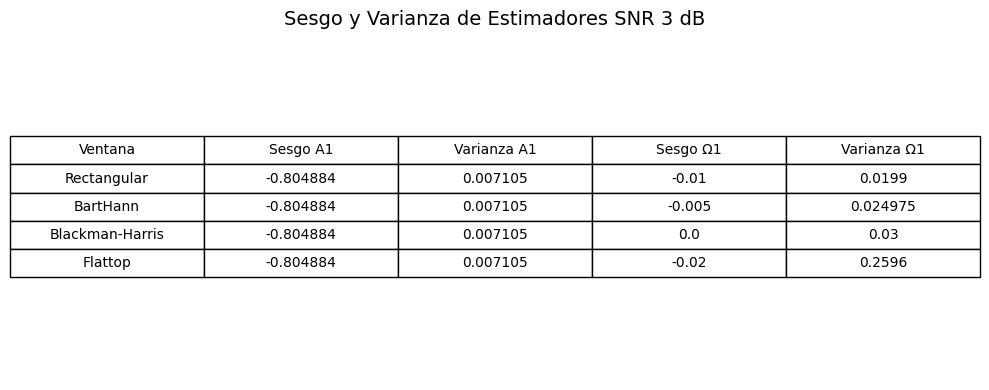

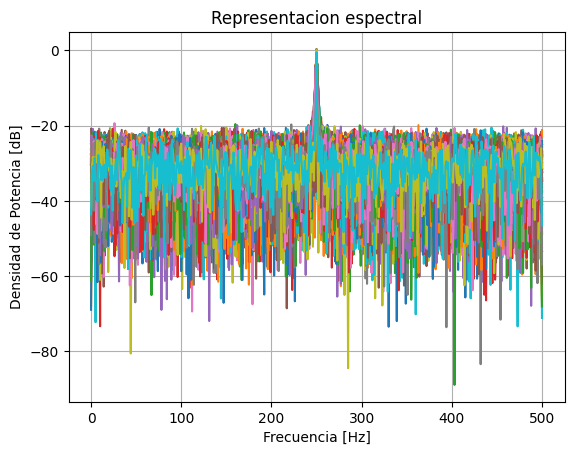

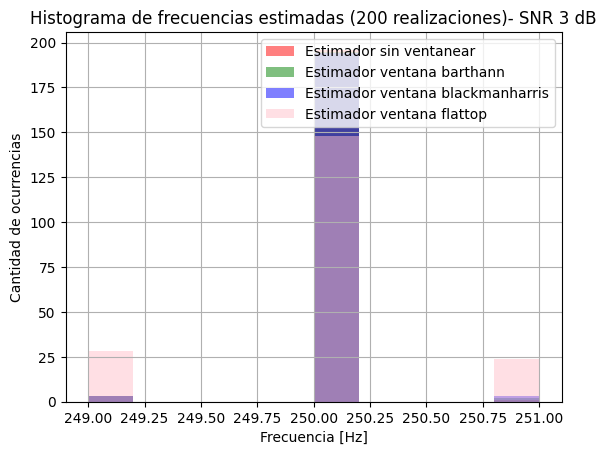

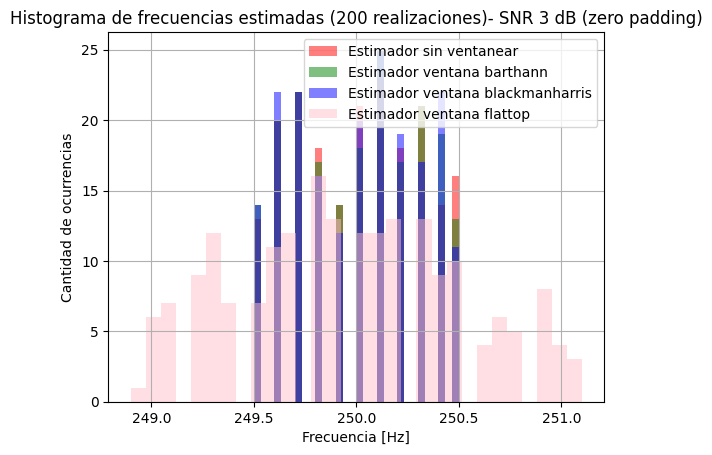

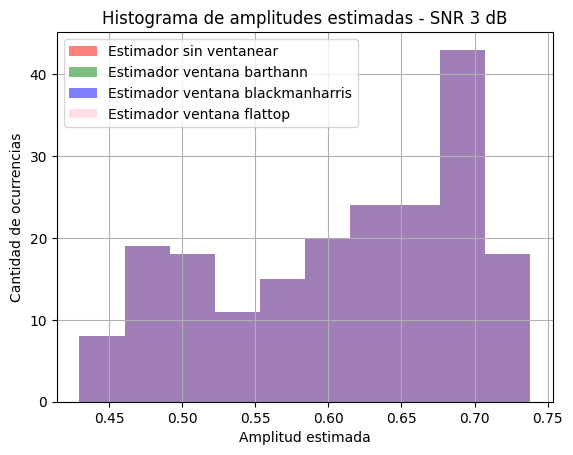

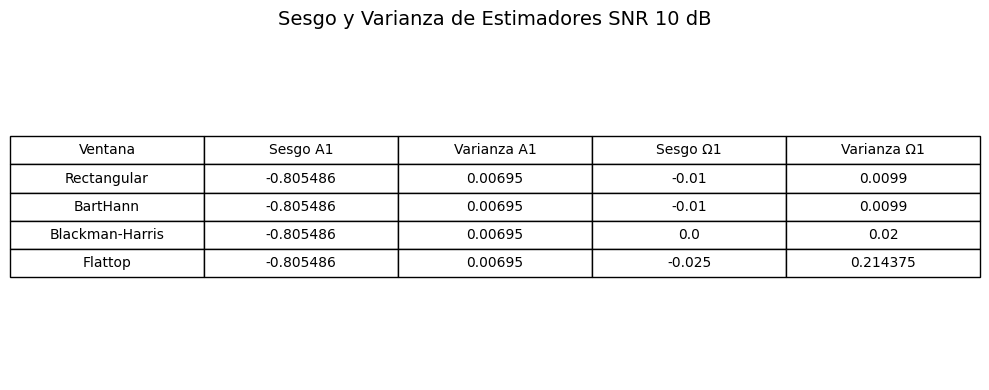

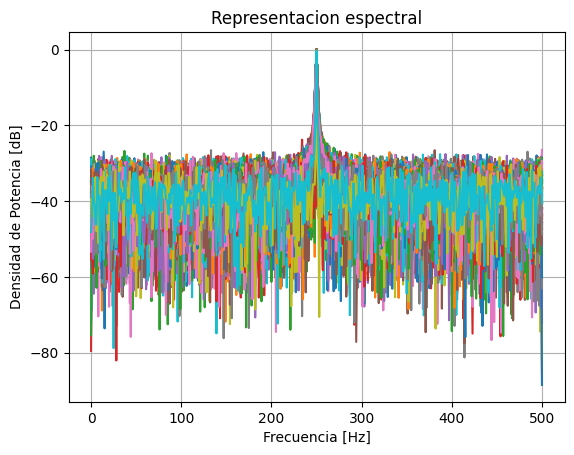

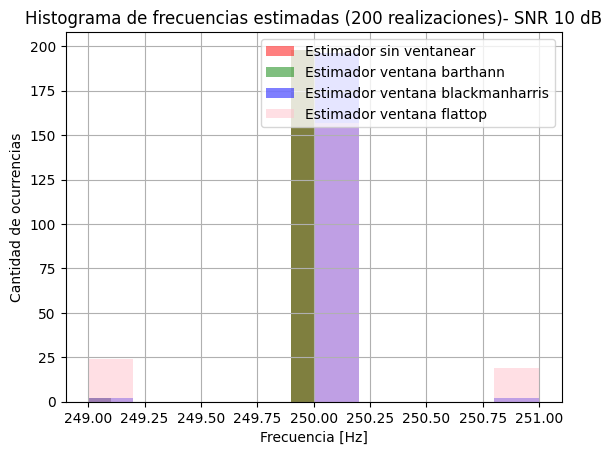

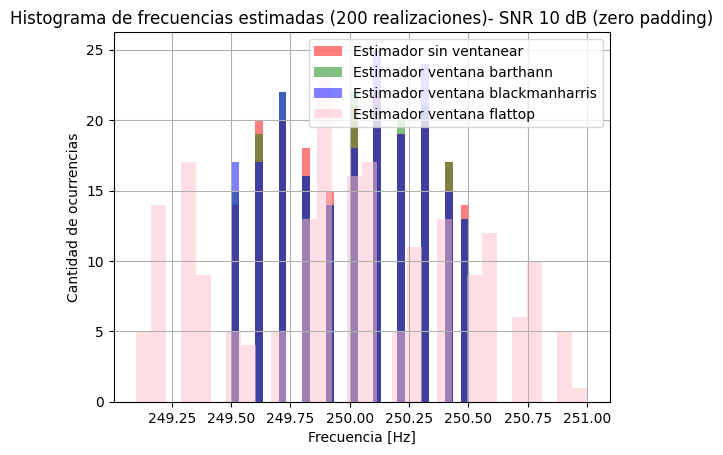

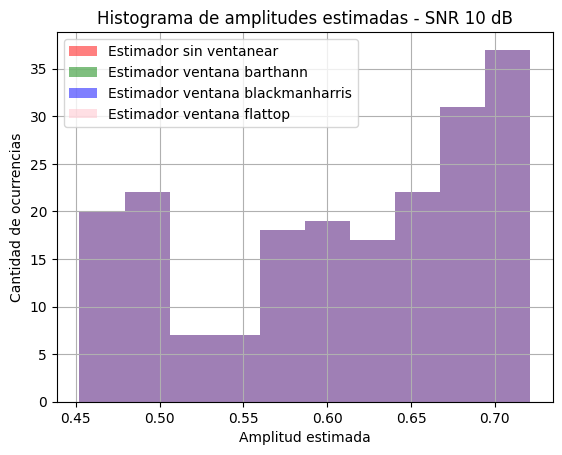

In [11]:
for snr_db in SNRs:
    # #%% Datos del ruido
    
    # # Señal analogica --> Lo saco de SNR
    pot_ruido_analog = 10**(- snr_db / 10)
    sigma= np.sqrt(pot_ruido_analog)
    # #Generacion de ruido analogico 
    nn = np.random.normal(0, sigma, (Np, R)) 
     
    # Señal final 
    xx = S + nn  # [1000x200]
    
    # Multiplicacion 
    xw= xx * w  # [1000, 200] * [1000, 1] → [1000, 200]
    xw2= xx * w2 
    xw3= xx * w3
    
    # Tranformada y estimadores 

    # Calculo la transformada sin zero padding 
    ft_xx = 1/N * np.fft.fft(xx,  axis=0) 
    ft_xw = 1/N * np.fft.fft(xw, axis=0) 
    ft_xw2 = 1/N * np.fft.fft(xw2, axis=0)
    ft_xw3 = 1/N * np.fft.fft(xw3, axis=0) 
    
    
    # Calculo la transformada con zero padding 
    ft_xx_pp = 1/N * np.fft.fft(xx,n=N2, axis=0) 
    ft_xw_pp = 1/N * np.fft.fft(xw, n=N2, axis=0) 
    ft_xw2_pp = 1/N * np.fft.fft(xw2, n=N2, axis=0)
    ft_xw3_pp = 1/N * np.fft.fft(xw3, n=N2, axis=0)
    
    # Calculo el estimador de amplitud (a1=mod(ft_xw))
    
    #Estimador
    # # Estimador sin ventanear
    a1_est= np.abs(ft_xx)  # [1000, 200] // Division entera
    a1_est_max = np.max(a1_est, axis=0) 
    
    # # Estimador ventana barthann
    a1_est2= np.abs(ft_xx)  # [1000, 200] // Division entera
    a1_est_max2 = np.max(a1_est2, axis=0) 
    
    # # Estimador ventana blackmanharris
    a1_est3= np.abs(ft_xx)  # [1000, 200] // Division entera
    a1_est_max3 = np.max(a1_est3, axis=0) 
    
    # # Estimador  ventana flattop
    a1_est4= np.abs(ft_xx)  # [1000, 200] // Division entera
    a1_est_max4 = np.max(a1_est4, axis=0) 
    
    # SIN ZERO PADDING
    omega1_est = estimador_omega2(ft_xx, N, df)
    omega2_est = estimador_omega2(ft_xw, N, df)
    omega3_est = estimador_omega2(ft_xw2, N, df)
    omega4_est = estimador_omega2(ft_xw3, N, df)

    #BONUS- CON ZERO PADDING 
    omega1_est_pp = estimador_omega2(ft_xx_pp, N2, df_pp)
    omega2_est_pp = estimador_omega2(ft_xw_pp, N2, df_pp)
    omega3_est_pp = estimador_omega2(ft_xw2_pp, N2, df_pp)
    omega4_est_pp = estimador_omega2(ft_xw3_pp, N2, df_pp)
    
    #Calculo el sesgo y la varianza de estimador de amplitud
    valor_real=a1
    esperanza_a1_xx= np.mean(a1_est_max)
    esperanza_a1_xw= np.mean(a1_est_max2)
    esperanza_a1_xw2=np.mean(a1_est_max3)
    esperanza_a1_xw3= np.mean(a1_est_max4)
    
    sesgo_a1_xx= esperanza_a1_xx-valor_real
    sesgo_a1_xw= esperanza_a1_xw-valor_real
    sesgo_a1_xw2=esperanza_a1_xw2-valor_real
    sesgo_a1_xw3= esperanza_a1_xw3-valor_real
    
    varianza_a1_xx= np.var(a1_est_max)
    varianza_a1_xw=np.var(a1_est_max2)
    varianza_a1_xw2=np.var(a1_est_max3)
    varianza_a1_xw3=np.var(a1_est_max4)
    
    #Calculo el sesgo y la varianza de estimador de frecuencia espectral
    
    valor_real2= omega0 

    esperanza_o_xx= np.mean(omega1_est)
    esperanza_o_xw= np.mean(omega2_est)
    esperanza_o_xw2=np.mean(omega3_est)
    esperanza_o_xw3= np.mean(omega4_est)
    
    sesgo_xx_o= esperanza_o_xx-valor_real2
    sesgo_xw_o= esperanza_o_xw-valor_real2
    sesgo_xw2_o=esperanza_o_xw2-valor_real2
    sesgo_xw3_o= esperanza_o_xw3-valor_real2
    
    varianza_xx_o= np.var(omega1_est)
    varianza_xw_o=np.var(omega2_est)
    varianza_xw2_o=np.var(omega3_est)
    varianza_xw3_o=np.var(omega4_est)
    

    nombres_ventanas = ['Rectangular', 'BartHann', 'Blackman-Harris', 'Flattop']
    sesgos_amplitud = [sesgo_a1_xx, sesgo_a1_xw, sesgo_a1_xw2, sesgo_a1_xw3]
    varianzas_amplitud = [varianza_a1_xx, varianza_a1_xw, varianza_a1_xw2, varianza_a1_xw3]
    sesgos_frecuencia = [sesgo_xx_o, sesgo_xw_o, sesgo_xw2_o, sesgo_xw3_o]
    varianzas_frecuencia = [varianza_xx_o, varianza_xw_o, varianza_xw2_o, varianza_xw3_o]
    
    # Armar los datos como una lista de filas
    tabla_datos = []
    for i in range(len(nombres_ventanas)):
        fila = [
            nombres_ventanas[i],
            round(sesgos_amplitud[i], 6),
            round(varianzas_amplitud[i], 6),
            round(sesgos_frecuencia[i], 6),
            round(varianzas_frecuencia[i], 6)
        ]
        tabla_datos.append(fila)
    
    # Mostrar la tabla como imagen
    fig, ax = plt.subplots(figsize=(10, 2 + len(tabla_datos)*0.5))
    ax.axis('off')
    tabla = ax.table(
        cellText=tabla_datos,
        colLabels=['Ventana', 'Sesgo A1', 'Varianza A1', 'Sesgo Ω1', 'Varianza Ω1'],
        loc='center',
        cellLoc='center',
        colLoc='center'
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1, 1.5)
    
    plt.title('Sesgo y Varianza de Estimadores SNR {} dB'.format(snr_db), fontsize=14)
    plt.tight_layout()
    plt.show()

    ###HISTOGRAMA###
    plt.figure()
    bfrec= ff <= fs / 2
    plt.plot(ff[bfrec], 10 * np.log10(2 * np.abs(ft_xx[bfrec])**2))
    plt.title('Representacion espectral' )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.grid(True)
    
    plt.figure()
    plt.hist(omega1_est, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear")
    plt.hist(omega2_est, bins=10, color='green',alpha=0.5, label="Estimador ventana barthann")
    plt.hist(omega3_est, bins=10, color='blue',alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(omega4_est, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.title("Histograma de frecuencias estimadas (200 realizaciones)- SNR {} dB".format(snr_db))
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    plt.legend()

    plt.figure()
    plt.hist(omega1_est_pp, bins=30, color='red', alpha=0.5, label="Estimador sin ventanear")
    plt.hist(omega2_est_pp, bins=30, color='green',alpha=0.5, label="Estimador ventana barthann")
    plt.hist(omega3_est_pp, bins=30, color='blue',alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(omega4_est_pp, bins=30, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.title("Histograma de frecuencias estimadas (200 realizaciones)- SNR {} dB (zero padding)".format(snr_db))
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    plt.legend()
    
    plt.figure()
    plt.hist(a1_est_max, bins=10, color='red', alpha=0.5, label="Estimador sin ventanear") #Bins: resolucion espectral del histograma; conteo relativo. ANCHURA de los valores.
    plt.hist(a1_est_max2, bins=10, color='green', alpha=0.5, label="Estimador ventana barthann")
    plt.hist(a1_est_max3, bins=10, color='blue', alpha=0.5, label="Estimador ventana blackmanharris")
    plt.hist(a1_est_max4, bins=10, color='pink', alpha=0.5, label="Estimador ventana flattop")
    plt.legend()

    plt.title("Histograma de amplitudes estimadas - SNR {} dB".format(snr_db))
    plt.xlabel("Amplitud estimada")
    plt.ylabel("Cantidad de ocurrencias")
    plt.grid(True)
    
plt.show()


### Analisis

El cambio más significativo que podemos observar se encuentra en la estimación de la amplitud. Inicialmente, la amplitud se estimó tomando el valor del espectro en un bin fijo (N//4), asumiendo que en ese punto se encontraría la frecuencia de espectro máximo, dado que se consideró que $  \Omega_0= π/2 $, lo que corresponde a una frecuencia de 250 Hz, que es justo 1/4 de la cantidad de muestras. En este caso, la frecuencia se obtuvo identificando el índice del valor máximo dentro del espectro de magnitudes. Sin embargo, en el segundo estimador, la amplitud se calculó como el valor máximo de todo el espectro para cada señal, lo que resulta en una estimación más precisa. Esto se debe a que este enfoque no depende de una ubicación específica en el espectro; independientemente de cuál sea la frecuencia en la que ocurre el pico, el estimador siempre lo calculará correctamente, lo que lo hace más robusto frente a variaciones en la forma espectral de la señal.

La principal diferencia entre ambos métodos radica en cómo enfrentan la dispersión espectral que introducen las ventanas. En el primer caso, al tomar un bin fijo, se asume que la energía de la señal siempre cae en la misma posición del espectro, lo cual no es válido cuando hay leakage o cuando las ventanas suavizan y ensanchan los picos. Esto produce estimaciones de amplitud con sesgos y varianzas muy dependientes del tipo de ventana usada: algunas concentran mejor la energía y otras la distribuyen más, generando diferencias significativas entre ventanas. De hecho, observamos que en ese caso, los valores estimados de amplitud tienen rangos muy distintos según la ventana, y también sus errores son variables.

En cambio, al usar el valor máximo como estimador de la amplitud, nos aseguramos de capturar el punto más energético del espectro, sin importar exactamente dónde se ubique. Esto permite que la estimación se adapte a la forma espectral impuesta por cada ventana, y por lo tanto, los resultados son más homogéneos entre ventanas. Si bien este método no compensa explícitamente la ganancia de cada ventana (un proceso que requeriría aplicar un factor de corrección por ventana), actúa como una forma de mitigar ese problema: al no depender de un bin fijo, se reduce el sesgo introducido por la forma del lóbulo principal y de los secundarios. Así, los errores en la estimación de amplitud son menores, y más consistentes entre ventanas, lo cual facilita la comparación entre distintos métodos de apuntamiento espectral.

Además, al comparar los estimadores de frecuencia, se observa que ambos métodos —tanto el que busca el máximo en el módulo del espectro $FT_{abs}$ como el que lo hace sobre la potencia espectral $ P_{est} = \frac{1}{N} \cdot (FT_{abs}^2) $ arrojan prácticamente los mismos resultados. Esto se debe a que ambos están buscando el mismo pico en el espectro, y la operación de elevar al cuadrado no cambia la posición del máximo, solo su escala. Por eso, las estimaciones de frecuencia son muy similares, independientemente de si se usa la energía espectral o la magnitud. Esta coincidencia es esperable, ya que las variaciones en la forma del pico (producto del tipo de ventana) afectan más la dispersión energética lateral que la ubicación del máximo, que suele mantenerse bastante estable.